This notebook analyses patient information about heart disease using statistical tests like T-tests, ANOVA & Tukey, and Chi-Square.

The aim is to identify factors and their correlation to heart disease.

In [30]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind # Two Sample T-test (for independent groups)
from scipy.stats import f_oneway # ANOVA test (analysis of variance)
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Pairwise Tukey Test
from scipy.stats import chi2_contingency # Chi-Square Test

In [31]:
# load dataset
url = 'https://raw.githubusercontent.com/elsbethcodes/data-portfolio/refs/heads/main/heart-disease/heart_disease.csv'
heart = pd.read_csv(url)

In [47]:
# find information about column names, number of rows, null values, datatypes, etc.
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            303 non-null    int64 
 1   sex            303 non-null    object
 2   trestbps       303 non-null    int64 
 3   chol           303 non-null    int64 
 4   cp             303 non-null    object
 5   exang          303 non-null    int64 
 6   fbs            303 non-null    int64 
 7   thalach        303 non-null    int64 
 8   heart_disease  303 non-null    object
dtypes: int64(6), object(3)
memory usage: 21.4+ KB
None


In [49]:
# view first 5 rows
print(heart.head())

   age     sex  trestbps  chol                cp  exang  fbs  thalach  \
0   63    male       145   233    typical angina      0    1      150   
1   67    male       160   286      asymptomatic      1    0      108   
2   67    male       120   229      asymptomatic      1    0      129   
3   37    male       130   250  non-anginal pain      0    0      187   
4   41  female       130   204   atypical angina      0    0      172   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


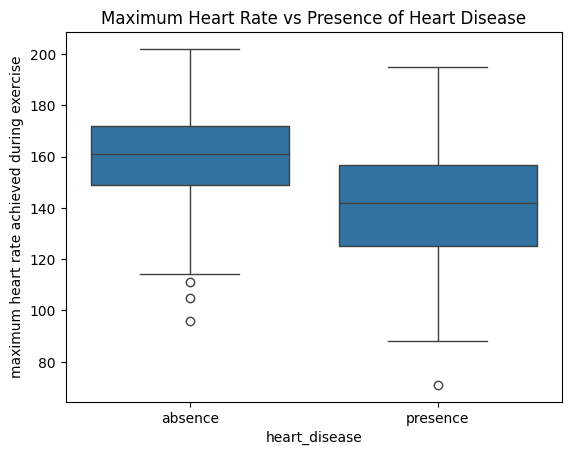

<Figure size 640x480 with 0 Axes>

In [33]:
# boxplot for visual comparison of data groups
sns.boxplot(x='heart_disease', y='thalach', data=heart)
plt.ylabel('maximum heart rate achieved during exercise')
plt.title('Maximum Heart Rate vs Presence of Heart Disease')
plt.show()
plt.clf()
# Conclusion: those with heart disease have a lower maximum heart rate on average than those without heart disease.

In [34]:
# create subgroups
thalach_hd = heart['thalach'][heart['heart_disease']=='presence']
thalach_no_hd = heart['thalach'][heart['heart_disease']=='absence']

In [35]:
# comparison of averages
mean_diff = np.mean(thalach_no_hd) - np.mean(thalach_hd)
median_diff = np.median(thalach_no_hd) - np.median(thalach_hd)
print(mean_diff)
print(median_diff)

19.11905597473242
19.0


In [36]:
# Two sample t-test to test the following hypotheses:
# Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
# Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.
tval, pval = ttest_ind(thalach_hd, thalach_no_hd)
print(pval)
if pval < 0.05:
  print('There is significant evidence that the average thalach for a person with heart disease is not equal to the average thalach for a person with heart disease.')
else:
  print('There is insignificant evidence that the average thalach for a person with heart disease is not equal to the average thalach for a person with heart disease.')

3.456964908430172e-14
There is significant evidence that the average thalach for a person with heart disease is not equal to the average thalach for a person with heart disease.


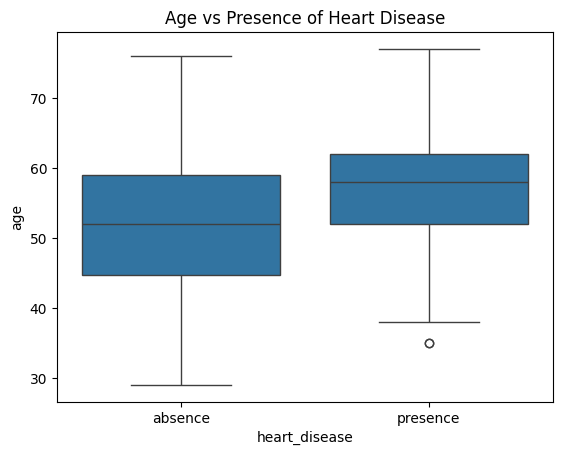

<Figure size 640x480 with 0 Axes>

In [37]:
# boxplot for visual comparison of data groups
sns.boxplot(x='heart_disease', y='age', data=heart)
plt.title('Age vs Presence of Heart Disease')
plt.show()
plt.clf()
# Conclusion: Those with heart disease have a higher age on average than those who do not.

In [38]:
# create subgroups
age_hd = heart['age'][heart['heart_disease']=='presence']
age_no_hd = heart['age'][heart['heart_disease']=='absence']

In [39]:
# comparison of averages
mean_diff = np.mean(age_no_hd) - np.mean(age_hd)
median_diff = np.median(age_no_hd) - np.median(age_hd)
print(mean_diff)
print(median_diff)

-4.040533426917001
-6.0


In [40]:
# Two sample t-test to test the following hypotheses:
# Null Hypothesis: The average age for a person with heart disease is equal to the average age for a person without heart disease.
# Alternative Hypothesis: The average age for a person with heart disease is NOT equal to the average age for a person without heart disease.
tval, pval = ttest_ind(age_hd, age_no_hd)
print(pval)
if pval < 0.05:
  print('There is significant evidence that the average age for a person with heart disease is not equal to the average age for a person with heart disease.')
else:
  print('There is insignificant evidence that the average age for a person with heart disease is not equal to the average age for a person with heart disease.')

8.955636917529706e-05
There is significant evidence that the average age for a person with heart disease is not equal to the average age for a person with heart disease.


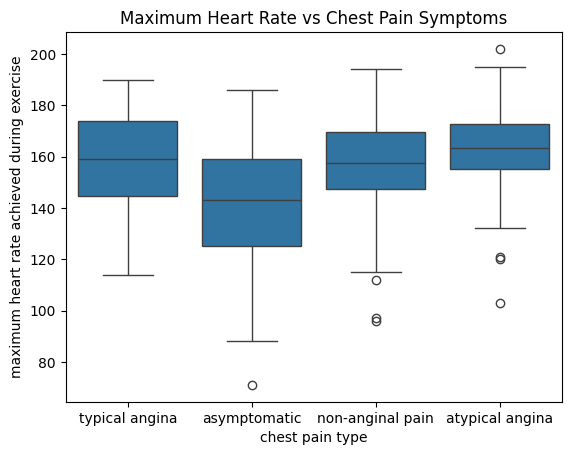

<Figure size 640x480 with 0 Axes>

In [41]:
sns.boxplot(x='cp', y='thalach', data=heart)
plt.title('Maximum Heart Rate vs Chest Pain Symptoms')
plt.xlabel('chest pain type')
plt.ylabel('maximum heart rate achieved during exercise')
plt.show()
plt.clf()
# conclusion: people with the asymptomatic case of heart disease have a lower maximum heart rate on average.

In [42]:
# create subgroups
thalach_typical = heart['thalach'][heart['cp']=='typical angina']
thalach_asymptom = heart['thalach'][heart['cp']=='asymptomatic']
thalach_nonangin = heart['thalach'][heart['cp']=='non-anginal pain']
thalach_atypical = heart['thalach'][heart['cp']=='atypical angina']

In [43]:
# ANOVA test to compare two or more means (type 1 error limited to 5%)
# Null Hypothesis: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
# Alternative Hypothesis: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.
fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print(pval)
if pval < 0.05:
  print('There is at least one pair of chest pain categories for which people have statistically significant different maximum heart rates.')
else:
  print('No pair of chest pain categories has statistically significant different maximum heart rates.')

1.9065505247705008e-10
There is at least one pair of chest pain categories for which people have statistically significant different maximum heart rates.


In [44]:
# Tukey-test - which pairs are significantly different
result = pairwise_tukeyhsd(endog = heart['thalach'], groups = heart['cp'], alpha=0.05)
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


In [45]:
# prepare contingency table for chi-square test
Xtab = pd.crosstab(heart['cp'], heart['heart_disease'])
print(Xtab)

# chi-square can compare two categorical variables, given a contingency table
chi2, pval, dof, exp = chi2_contingency(Xtab)
print(pval)
if pval < 0.05:
  print('There is statistically significant evidence that there is an association between chest pain type and whether or not someone is diagnosed with heart disease.')
else:
  print('There is not statistically significant evidence that there is an association between chest pain type and whether or not someone is diagnosed with heart disease.')

heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7
1.2517106007837527e-17
There is statistically significant evidence that there is an association between chest pain type and whether or not someone is diagnosed with heart disease.
